# Baseline examples

Charles Le Losq

August 2016; updated February 2019

This notebook shows examples of how to use the baseline function, and compares the outcomes of using splines over machine learning algorithms.

DISCLAIMER: the fits shown in this notebook are purely illustrative and do not aim to show how to fit a "good" background.

First we call the relevant libraries.

In [5]:
using Spectra
using DelimitedFiles
using PyPlot

Now we import one of the Raman spectrum from the example data folder, and we plot it to have a nice look at it.

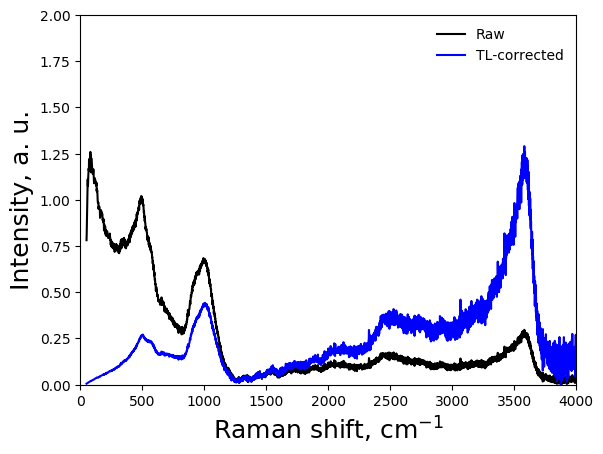

PyObject Text(34,0.5,'Intensity, a. u.')

In [32]:
# We import the spectrum
spectra = readdlm("./data/r040.txt",'\t',Float64,'\n',skipstart=1)

# We check that the x values (Raman shifts) are increasing, if not we flip the array
spectra = spectra[end:-1:1,:]

# Before the temperature-excitation line correction, we remove the minimum value fo the spectrum. This limits the distortion of the spectrum:
spectra[:,2] = spectra[:,2] .- minimum(spectra[:,2])

# We perform the temperature-excitation line correction
x, y_long,ese_long = tlcorrection(spectra,23.0,532.0);

y = spectra[:,2] # this one will record the raw signal. We will use it later.

# Now a plot of the entire spectrum, raw and corrected from temperature and excitation line effect.
# We need to normalise the original spectrum as the tlcorrection applies automatically a normalisation of the signal to
# the area beyond it. We will use the trapz function (see Spectra documentation)
scaling_factor = 1000.
figure() # we create the figure

# Here are the functions to plot the lines
plot(x,y./trapz(x,y).*scaling_factor,color="black",label="Raw")
plot(x,y_long.*scaling_factor,color="blue",label="TL-corrected")

# we set the limits fo the axis
xlim(0,4000)
ylim(0.,2.0)

# we display the legend at the best location, without a frame
legend(loc="best",frameon=false)

# we set the values of the labels of the x and y axis.
xlabel(L"Raman shift, cm$^{-1}$",fontsize=18) # The L in front of the string indicates that we use Latex
ylabel("Intensity, a. u.",fontsize=18)

# Subtracting baseline from Raman spectra after temperature and excitation line effect corrections


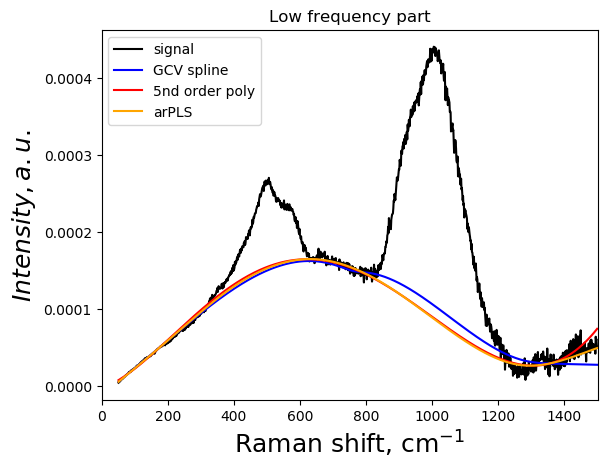

PyObject Text(38,0.5,'$Intensity, a. u.$')

In [42]:
# We define the portions of the spectra where we want to fit the signal background.
# They are called regions of interest (roi) or background interpolation regions (bir) in Spectra.jl.
roi = [0. 200.; 640. 650.; 700. 810.; 1270. 1400.; 2500. 3000.; 3800. 4000.]

# There we restrain the fit of the background to a specific low or high frequency wavelength. 
# This will affect the smoothing coefficient for th gcvspline for instance
x_fit=x[x.<1500]
y_fit=y_long[x.<1500]

y_gcvspline, bas_gcvspline = baseline(x_fit,y_fit,roi,"gcvspline",s=0.1)
# We also try the polynomial function, with an explicit output of the x and y values used to fit the signal in the 
# xy_roi array. We will use it in the plots.
y_poly, bas_poly = baseline(x_fit,y_fit,roi,"poly",polynomial_order=5)

# arPLS algorithm
y_arpls, bas_arpls = baseline(x_fit,y_fit,roi,"arPLS",lam=10.0^7,p=0.01)

figure()
title("Low frequency part")

# plotting the initial signal and the roi
plot(x_fit,y_fit,"black",label="signal")

# plotting the baselines
plot(x_fit,bas_gcvspline,"blue",label="GCV spline")
plot(x_fit,bas_poly,"red",label="5nd order poly")
plot(x_fit,bas_arpls,"orange",label="arPLS")

# defining some things for the plot limits / labels / legend
xlim(0,1500)
#ylim(0,maximum(y_fit[x_fit.<1500]))
legend(loc="best")
xlabel(L"Raman shift, cm$^{-1}$",fontsize=18)
ylabel(L"Intensity, a. u.",fontsize=18)

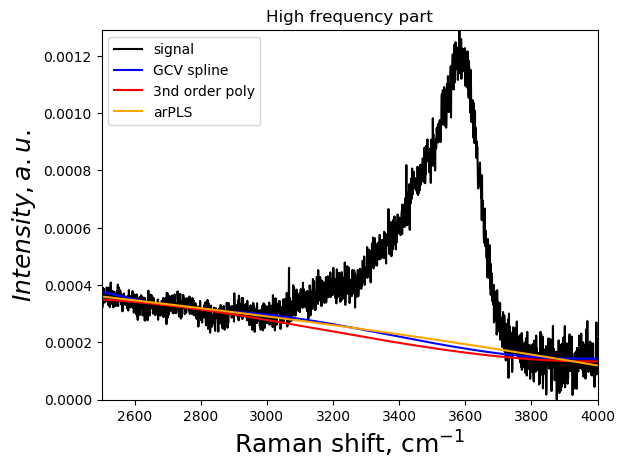

PyObject Text(38,0.5,'$Intensity, a. u.$')

In [49]:
x_fit=x[x.>2500.]
y_fit=y_long[x.>2500.]

y_gcvspline, bas_gcvspline = baseline(x_fit,y_fit,roi,"gcvspline",s=1.0)
y_poly, bas_poly = baseline(x_fit,y_fit,roi,"poly",polynomial_order=3)
y_arpls, bas_arpls = baseline(x_fit,y_fit,roi,"arPLS",lam=10.0^11,p=0.01)

figure()
title("High frequency part")
plot(x_fit,y_fit,"black",label="signal")

plot(x_fit,bas_gcvspline,"blue",label="GCV spline")
plot(x_fit,bas_poly,"red",label="3nd order poly")
plot(x_fit,bas_arpls,"orange",label="arPLS")

xlim(2500,4000)
ylim(0,maximum(y_fit[x_fit.>2500]))
legend(loc="best")
xlabel(L"Raman shift, cm$^{-1}$",fontsize=18)
ylabel(L"Intensity, a. u.",fontsize=18)